# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

1.1

En transformermodell skal trenes opp til å forsøke å predikere et heltall $d$, hvor $d = a \cdot b + c$, hvor $a$ og $c$ er tosifrede heltall og $b$ er et ettsifret heltall. Vi kan se på et eksempel på et datasett som kan brukes for å trene opp modellen.

Vi kan la
\begin{align*}
    r &= 2,   a = 28,  
 b = 4,   c = 18,   d = 130, \\
\end{align*}
Input $x$ vil være tallene $a$, $b$ og $c$. I tillegg vil de første sifferne i $d$ være inkludert i input, fordi vi ønsker at transformermodellen skal trenes opp til å finne det siste sifferet i $d$. Output $y$ vil være tallet $d$ som man ønsker å predikere. Dermed har vi altså

\begin{align*}
    x &= [2,8,4,1,8,1,3] \quad \text{og} \quad y = [1,3,0], \\
\end{align*}

1.2

Vi ser videre på et eksempel på hvordan transformermodellen $f_{\theta}$ kan predikere tallet $d$ for samme type problem.

Transformermodellen vil utføre følgende operasjon
\begin{align*}
    \hat{z} &= [\hat{z}_0, \ldots, \hat{z}_6] = f_{\theta}([2,8,4,1,8,1,3]), \\
\end{align*}
hvor det er ønskelig å finne en $\theta$ slik at 
\begin{align*}
    \hat{y} &= [\hat{z}_{4}, \hat{z}_{5}, \hat{z}_{6}] = [0,3,1].\\
\end{align*}
Transformermodellen vil ved addisjon beregne siste siffer først og tallet $d$ vil dermed være $\hat{z}_{6}\hat{z}_{5}\hat{z}_{4} = 130$

Vi lar igjen $r = 2, a = 18, b = 3, c = 22$.
Et nytt siffer vil predikeres for hvert lag i transformermodellen. Prosessen vil dermed se slik ut:
\begin{align*}
    x^{(0)} &= [1,8,3,2,2], & [\hat{z}_{0}^{(0)},\hat{z}_{1}^{(0)},\hat{z}_{2}^{(0)},\hat{z}_{3}^{(0)},\hat{z}_{4}^{(0)},\textcolor{red}{\hat{z}_{5}^{(0)}}] = f_\theta(x^{(0)}), \\
    x^{(1)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{blue}{\hat{z}_{6}^{(1)}}] = f_\theta(x^{(1)}), \\ 
    x^{(2)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{gold}{\hat{z}_{7}^{(2)}}] = f_\theta(x^{(2)}), \\
    x^{(3)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}] \\
    \hat{y} &= [\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}]. \\
\end{align*}

Her ønsker vi altså at $d = \textcolor{gold}{\hat{z}_{7}^{(2)}}\textcolor{blue}{\hat{z}_{6}^{(1)}}\textcolor{red}{\hat{z}_{5}^{(0)}} = 130$

1.3

La $m = 5$ og $y = [4,3,2,1]$. Vi bruker cross-entropy som objektfunksjon $\mathcal{L}$, og ønsker å finne en sannsynlighetsfordeling $\hat Y$ som gir $\mathcal{L}(\theta, \mathcal{D}) = 0$.

Ved å gjøre operasjonen $\text{onehot}(y)$, får vi representert $y$ som en matrise Y

$$Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$


Objektfunksjonen cross-entropy vil i vårt tilfelle se slik ut:


\begin{align*}
\mathcal{L}(\theta, \mathcal{D}) &= -\frac{1}{4} \sum_{i=0}^{0} \sum_{j=0}^{4} \log Y_{kj}^{(i)}
\end{align*}

hvor det i ytre løkke kun summeres opp til $D = 0$, siden vi kun har ett datasett. I indre løkke summeres det opp til $n = 4$, fordi vi har fire elementer i $y$.

Siden vi ønsker at $\mathcal{L}(\theta, \mathcal{D}) = 0$, vil vi at alle $Y_{kj}^{(i)} = 1$, slik at logaritmen blir $0$.



$$\hat Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$

Altså har vi at:


\begin{align*}
Y_{4,0} &= 1 \\
Y_{3,1} &= 1 \\
Y_{2,2} &= 1 \\
Y_{1,3} &= 1 \\
\end{align*}

Alle andre elementer i matrisen er $0$. Vi kan videre forenkle uttrykket for kryssentropien:

$$\mathcal{L}(\theta, \mathcal{D}) = -\frac{1}{4} \left( \log Y_{4,0} + \log Y_{3,1} + \log Y_{2,2} + \log Y_{1,3} \right) \\$$
$$= -\frac{1}{4} \left( \log 1 + \log 1 + \log 1 + \log 1 \right) = -\frac{1}{4} \cdot 4 \cdot \log 1 \\$$
$$= -\frac{4}{4} \cdot 0 = 0$$


Altså har vi at $ \mathcal{L}(\theta, \mathcal{D}) = 0 $.

Vi må i dette tilfellet ha at $\hat y = y = [4,3,2,1]$. Dette kan man se dersom man utfører operasjonen $\text{argmax}_{\text{col}}(\hat Y)$. Det kan også lett observeres ut fra at $\hat Y = Y$.

1.4

Det kan beregnes hvor mange enkeltparametre som inkluderes i transformermodellen. Vi kan begynne med å se på settet av parametere
\begin{align*}
\theta = \{ W_E, W_P, W_U, \{W_O^{(l)}, W_V^{(l)}, W_Q^{(l)}, W_K^{(l)}, W_1^{(l)}, W_2^{(l)}\}_{l=0}^{L-1} \}
\end{align*}
Med $L$ lag, og dimensjoner $d$, $m$, $n_{max}$, $k$ og $p$, vil antallet enkeltparametere $w$, som må bestemmes ved optimering, bli

\begin{align*}
w &=  d \cdot m + d \cdot n_{\text{max}} + d \cdot m + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\} \\
&= 2(d\cdot m) + d\cdot n_{\text{max}} + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\}
\end{align*}

1.5

Vi ønsker å vise at man må ha $\alpha > 1$ for å få $\hat{z} = [1]$ når input er $x = [1]$ og $n = n_{max} = 1, m = d = k = p = 2$ og $L = 1$. Vi kan starte med å gå manuelt gjennom hele transformeralgoritmen med de gitte verdiene. De første stegene gjøres i embedding.

$$x = [1], \quad m = 2 \\
X = \text{onehot}(x) = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix} \\$$

$$W_{E} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
W_{P} = \begin{bmatrix}
    1  \\
    0  \\
\end{bmatrix} \\$$
$$z_{0} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    0 \\
    \alpha \\
\end{bmatrix}
+ \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \\$$


Videre utføres attention-laget.

$$z_{\frac{1}{2}} = z_0 + W_{O}^{T}W_{V}z_{0}A(z_{0})$$
$$ = z_{0} + W_{O}^{T}W_{V}z_{0}\text{ softmax}_{\text{col }}(z_{0}^{T}W_{Q}^{T}W_{K}z_{0} + D)$$
$$= \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 & 0 \\
    1 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \text{softmax}_{\text{col } }(\begin{bmatrix}
    1 & \alpha
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + 0) \\$$

$$= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\text{softmax}_{\text{col }}(1+\alpha^2)
= 2 \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}$$

Deretter utføres feed-forward-laget.

$$z_1 = z_{\frac{1}{2}} + W_{2}^{T}\sigma(W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + W_{2}^{T}\text{max}(0,W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\text{max}\Bigg(0, \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\Bigg)\\$$
$$= 4\begin{bmatrix}
    1\\
    \alpha \\
\end{bmatrix}$$

Deretter benyttes $\text{softmax}_{\text{col}}$ for å finne sannsynlighetsfordelingen.

$$Z = \text{softmax}_{\text{col}}(W_{U}^{T}z_{1})\\$$
$$= \text{softmax}_{\text{col}}\bigg(4\begin{bmatrix}
        1 \\
        \alpha \\
    \end{bmatrix}\bigg)\\$$
$$= \frac{1}{e^{4}+e^{4\alpha}}\begin{bmatrix}
        e^{4} \\
        e^{4\alpha} \\
    \end{bmatrix}$$

Det kan observeres at $\text{argmax}_{\text{col}}(Z)$ vil returnere $\hat{z} = [1]$ dersom $Z_{10}$ er størst. Vi må altså ha at
\begin{align*}
e^{4\alpha} > e^{4} \implies \alpha > 1\\
\Box
\end{align*}

#### Oppgave 2

#### Oppgave 3.1

In [1]:
#Importerer nødvendige bibliotek
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [2]:
#definerer variabler
r = 4
m = 4

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

Vi kan videre gi nettverket vårt en input, la oss f.eks late som vi prøver å få modellen til å sortere tallene.

In [3]:
x = np.array([[0,1,2]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)

Vi kan så teste om vi fikk riktig output, som i dette tilfelle burde være at det er $0$ på siste element. Om vi har riktig output skulle loss funksjonen vårt bli 0.

In [4]:
y = np.array([[0]])
L = loss.forward(Z,y)

print(L)

1.3760630610953746


Dette fungerte åpenbart ikke enda. Etter å ha kjørt en forward pass, er det fint å teste backwardfunksjonen til lagene. Vi starter da med å beregne den deriverte av loss funksjonen

In [5]:
dLdz = loss.backward()
d0 = softmax.backward(dLdz)
d1 = un_embed.backward(d0)
d21 = ff1.backward(d1)
d22 = att1.backward(d21)
d3 = embed.backward(d22)

#### Oppgave 3.2

Vi lager en generell funksjon som vil trene nettverket vårt. Denne funksjonen tar inn datasettet i batcher og gjennomfører Adam-steg for å optimalisere parametrene. Vi plotter også $\mathcal{L}^{i}$ for $i = 0,\dots , n_{iter} − 1$ med logaritmisk skala på y-aksen.


In [6]:
def train_network(nn: NeuralNetwork, x_data, y_data, n_iters, step_size, m, start, stop):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i][:,start:stop]
            #Forward pass
            X = onehot(x,m)
            Z = nn.forward(X)
            #Backward pass
            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam(step_size)
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    #Plotter loss-funksjonen per itterasjon i en logaritmisk skala
    plt.plot(np.arange(0,n_iters), np.log(mean_losses))
    plt.xlabel("Iterasjonnummer")
    plt.ylabel("Logaritmen av loss-funksjon")
    plt.title("Minimering ved antall iterasjoner")
    plt.show()
    #Returnerer gjennomsnittet over objektfunksjonen over batchene
    return mean_losses


#### Oppgave 3.3

For oppgaven med sortering av 0 og 1

In [7]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

La oss prøve å trene!

Iterasjon  1  L =  0.6933100890221054 
Iterasjon  2  L =  0.670747321878496 
Iterasjon  3  L =  0.6305331496465393 
Iterasjon  4  L =  0.5347907830310554 
Iterasjon  5  L =  0.3733934361203698 
Iterasjon  6  L =  0.2599969001878302 
Iterasjon  7  L =  0.16914860494583345 
Iterasjon  8  L =  0.1268735604838946 
Iterasjon  9  L =  0.09907721436379538 
Iterasjon  10  L =  0.06888668161157967 
Iterasjon  11  L =  0.04443913915833294 
Iterasjon  12  L =  0.021203355253690333 
Iterasjon  13  L =  0.010284192138167617 
Iterasjon  14  L =  0.0026136659846755974 
Iterasjon  15  L =  0.0011290223932512884 
Iterasjon  16  L =  0.000738414862144844 
Iterasjon  17  L =  0.0005457674996701485 
Iterasjon  18  L =  0.00045206291949878585 
Iterasjon  19  L =  0.0003821508878860795 
Iterasjon  20  L =  0.00032849099913290366 
Iterasjon  21  L =  0.0002860400759450666 
Iterasjon  22  L =  0.00025165657027314533 
Iterasjon  23  L =  0.00022331168927985866 
Iterasjon  24  L =  0.00019964360639271626 
Itera

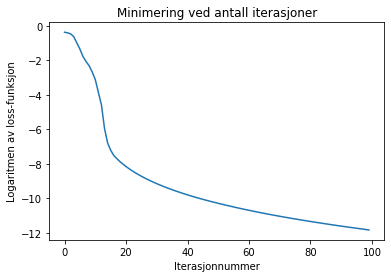

In [8]:
losses = train_network(nn, data['x_train'], data['y_train'], 100, 0.001, m, 4, 9)

Som vi ser optimerer vi objektfunksjonen gjennom treningen.

#### Tester for én iterasjon for å se om den greier å predikere neste verdi

In [9]:
x = np.array([[1, 0 ,0, 1, 0]])
X = onehot(x, m)

#forward pass
Z = nn.forward(X)
z_hat = np.argmax(Z, axis=1)

print(z_hat)

[[1 0 0 1 0]]


Når vi sender inn arrayet [1, 0, 0, 1, 1], vil vi ved å sende det gjennom algoritmen få predikert den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

Videre er det nyttig med en funksjon som kan gir inn testdataen til nettverket vårt, og så en funksjon som teller antall riktige prediksjoner.

In [10]:
def countCorrect(y_hat, y):
    batches = y_hat.shape[0]
    samples = y_hat[0].shape[0]

    counter = 0
    total = samples*batches

    for b in range(batches):
        for i in range(samples):
            if np.sum(y_hat[b,i] - y[b,i]) == 0:
                counter += 1
    print("Antall rette prediksjoner:", counter)
    print("Totalt antall prediksjoner:", total)
    print("Prosentvis riktige predikasjoner:", (counter/total)*100, "%")
    return


Så kan vi se hvorvidt nettverket vårt klarer å sortere eller ikke.

In [11]:
#Kaller på prediksjonsfunksjonen
y_hats = nn.predict(x_test, 2, 5)
#Teller antall rette prediksjoner
tell = countCorrect(y_hats, y_test)

Antall rette prediksjoner: 1000
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 100.0 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner ($2^5 = 32$). Denne mangfoldigheten gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret ($y$) i stedet for å forutsi neste sekvens. Dette antyder at vektene våre kanskje ikke er optimalt tilpasset.

In [12]:
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)

un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


Iterasjon  1  L =  1.6003321358241975 
Iterasjon  2  L =  1.5655135487219471 
Iterasjon  3  L =  1.5221893606932753 
Iterasjon  4  L =  1.4611742038199498 
Iterasjon  5  L =  1.3667690470283023 
Iterasjon  6  L =  1.2219713152063754 
Iterasjon  7  L =  1.0321309204348956 
Iterasjon  8  L =  0.8673685959533757 
Iterasjon  9  L =  0.7614504600401192 
Iterasjon  10  L =  0.697426087257442 
Iterasjon  11  L =  0.6794858849502486 
Iterasjon  12  L =  0.6744016908755699 
Iterasjon  13  L =  0.657376541549819 
Iterasjon  14  L =  0.6503218032078446 
Iterasjon  15  L =  0.6310229652323487 
Iterasjon  16  L =  0.6005768479337916 
Iterasjon  17  L =  0.5815571300299538 
Iterasjon  18  L =  0.5612780769219814 
Iterasjon  19  L =  0.5446414763173811 
Iterasjon  20  L =  0.5347471861868633 
Iterasjon  21  L =  0.51800340904678 
Iterasjon  22  L =  0.5177897776759326 
Iterasjon  23  L =  0.4986769351950782 
Iterasjon  24  L =  0.4977565213857189 
Iterasjon  25  L =  0.4766578928521831 
Iterasjon  26

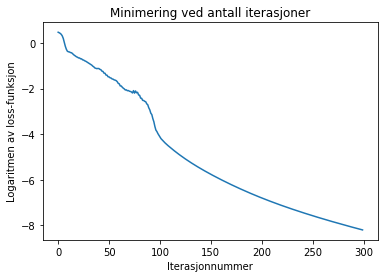

In [13]:
losses = train_network(nn, data['x_train'], data['y_train'], 300, 0.001, m, 6, 13)

In [15]:
#Henter prediksjonsfunksjonen
y_hats = nn.predict(x_test, 5, 7)

tell = countCorrect(y_hats, y_test)

Antall rette prediksjoner: 999
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 99.9 %


In [16]:
from data_generators import get_train_test_addition
#definerer variabler
r = 4
m = 10
n_max = 3*r

d = 30
k = 20
p = 40
L = 3

#Lager 3 lag til nn
att1 = Attention(d,k)
att2 = Attention(d,k)
att3 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
ff3 = FeedForward(d,p)

embed = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

#Lager det nevrale nettverket på nytt
nn = NeuralNetwork([embed, att1, ff1, att2, ff2, att3, ff3, un_embed, softmax])
#implementerer trenignsdata. 2 siffer i tallene vi adderer, 20 batches med 250 samples per batch, og 4 batches vi kan teste med
data = get_train_test_addition(2, samples_per_batch=250,n_batches_train=20, n_batches_test=4)
#Henter ut data
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Iterasjon  1  L =  2.2454979898195773 
Iterasjon  2  L =  1.999142133223404 
Iterasjon  3  L =  1.7835447430115778 
Iterasjon  4  L =  1.7400087829091049 
Iterasjon  5  L =  1.6752067959854529 
Iterasjon  6  L =  1.5976970746610246 
Iterasjon  7  L =  1.550178853304426 
Iterasjon  8  L =  1.53458898862377 
Iterasjon  9  L =  1.5259607595509872 
Iterasjon  10  L =  1.5120530482382084 
Iterasjon  11  L =  1.4900824243634065 
Iterasjon  12  L =  1.4539015127928512 
Iterasjon  13  L =  1.4062846638888966 
Iterasjon  14  L =  1.3596949914921823 
Iterasjon  15  L =  1.2769149930329733 
Iterasjon  16  L =  1.2092653762540908 
Iterasjon  17  L =  1.1470840264198094 
Iterasjon  18  L =  1.0558493766480448 
Iterasjon  19  L =  0.9845398928651334 
Iterasjon  20  L =  0.9595488341518476 
Iterasjon  21  L =  0.8985564407183373 
Iterasjon  22  L =  0.7600633718932872 
Iterasjon  23  L =  0.6677284020966561 
Iterasjon  24  L =  0.6208117916910946 
Iterasjon  25  L =  0.5809929764400217 
Iterasjon  26

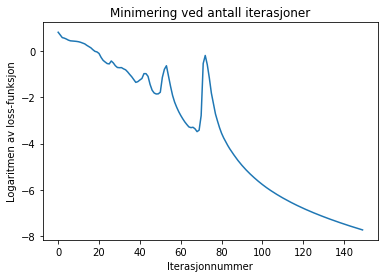

In [17]:
#Beregner og skriver ut loss for hver itterasjon
losses = train_network(nn, data['x_train'], data['y_train'], 150, 0.001, m, 3, 6)

Som vi ser fra figuren minimerer vi objektfunksjonen ved flere itterasjoner. 

In [20]:
#Beregner antall riktige prediksjoner av testdataen opp mot testdataen
y_hats = nn.predict(x_test, 10, 3)

Tell = countCorrect(y_hats, np.flip(y_test))

Antall rette prediksjoner: 1000
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 100.0 %
